# Stratified GridSearchCV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
cancer = datasets.load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# get the data
X = cancer.data
y = cancer.target

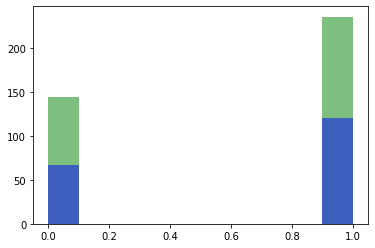

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5, color='g')
plt.hist(y_test, alpha=0.5, color='b')
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* SVM z jądrem rbf
* SVM z jądrem poly
* SVM liniowego
* Regresji logistycznej

In [6]:
from sklearn.model_selection import StratifiedKFold

seed = 123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

pipe1 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='rbf'))])
pipe2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='poly'))])
pipe3 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='linear'))])
pipe4 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression(n_jobs=-1, max_iter=100000))])


param_grid = {'preprocessing': [StandardScaler(), None],
              'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_1 = GridSearchCV(pipe1, param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 100,
 'classifier__gamma': 0.001,
 'preprocessing': StandardScaler()}

In [8]:
param_gridP = {'preprocessing': [StandardScaler()],
              'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [9]:
grid_2 = GridSearchCV(pipe2, param_gridP, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 0.001,
 'classifier__gamma': 1,
 'preprocessing': StandardScaler()}

In [10]:
grid_3 = GridSearchCV(pipe3, param_gridP, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__C': 0.1,
 'classifier__gamma': 0.001,
 'preprocessing': StandardScaler()}

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_1 = GridSearchCV(SVC(), param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'C': 1, 'gamma': 0.001}

In [11]:
param_gridL = {'preprocessing': [StandardScaler(), None],
              'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [12]:
grid_4 = GridSearchCV(pipe4, param_gridL, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__C': 0.1, 'preprocessing': StandardScaler()}

In [13]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [14]:
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)

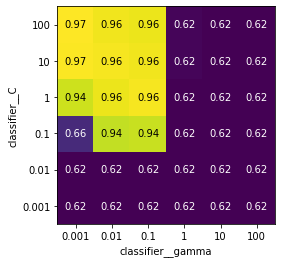

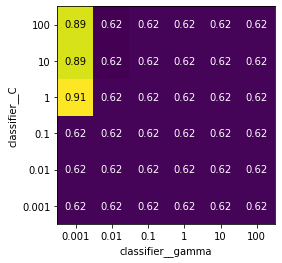

In [15]:
scores = np.array(results.mean_test_score).reshape(6, 6, 2)
scores = scores[:,:,0]
# plot the mean cross-validation scores
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

scores = np.array(results.mean_test_score).reshape(6, 6, 2)
scores = scores[:,:,1]
# plot the mean cross-validation scores
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

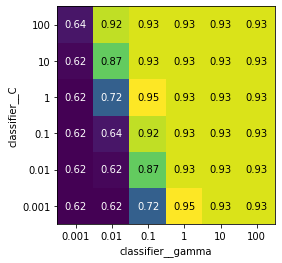

In [16]:
results = pd.DataFrame(grid_2.cv_results_)

scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

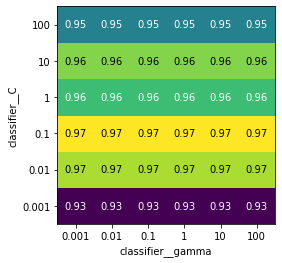

In [17]:
results = pd.DataFrame(grid_3.cv_results_)

scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

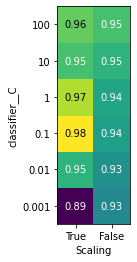

In [18]:
results = pd.DataFrame(grid_4.cv_results_)

scores = np.array(results.mean_test_score).reshape(6, 2)
# plot the mean cross-validation scores
heatmap(scores, xlabel='Scaling', xticklabels=["True", "False"], yticklabels=param_grid['classifier__C'], ylabel='classifier__C', cmap="viridis")
plt.show()

In [19]:
from sklearn import metrics

models = []
models.append(("SVM rbf", grid_1.best_estimator_))
models.append(("SVM poly", grid_2.best_estimator_))
models.append(("SVM linear", grid_3.best_estimator_))
models.append(("LogisticRegression", grid_4.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='weighted')))
    print("recall_score: {}".format(metrics.recall_score(y_test, model.predict(X_test), average='weighted')))
    print("f1_score: {}".format(metrics.f1_score(y_test, model.predict(X_test), average='weighted')))
    print("accuracy_score: {}".format(metrics.accuracy_score(y_test, model.predict(X_test))))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test), average='weighted'))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test), average='weighted'))
    f1_score.append(metrics.f1_score(y_test, model.predict(X_test), average='weighted'))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

SVM rbf
R^2: 0.9787234042553191
recall_score: 0.9787234042553191
f1_score: 0.9787234042553191
accuracy_score: 0.9787234042553191
SVM poly
R^2: 0.9629107326698696
recall_score: 0.9627659574468085
f1_score: 0.9625675769739437
accuracy_score: 0.9627659574468085
SVM linear
R^2: 0.9787234042553191
recall_score: 0.9787234042553191
f1_score: 0.9787234042553191
accuracy_score: 0.9787234042553191
LogisticRegression
R^2: 0.9840491591886777
recall_score: 0.9840425531914894
f1_score: 0.984015397042646
accuracy_score: 0.9840425531914894


In [20]:
d = {'precision_score': precision_score,
     'recall_score': recall_score,
     'f1_score': f1_score,
     'accuracy_score': accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM rbf', 'SVM poly', 'SVM linear', 'LogisticRegression'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,SVM rbf,0.978723,0.978723,0.978723,0.978723
1,SVM poly,0.962911,0.962766,0.962568,0.962766
2,SVM linear,0.978723,0.978723,0.978723,0.978723
3,LogisticRegression,0.984049,0.984043,0.984015,0.984043
